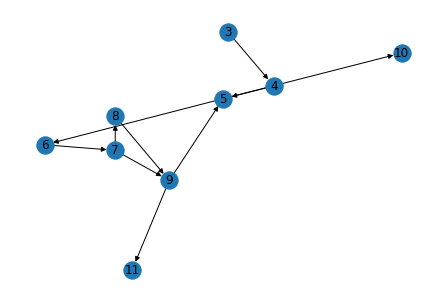

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()
G.add_nodes_from([3, 4, 5, 6, 7, 8, 9, 10, 11])
matrix = np.array(
    [
        #3,4,5,6,7,8,9,10,11,12
        [0,1,0,0,0,0,0,0,0],#"3"
        [0,0,1,0,0,0,0,0,0],#"4"
        [0,0,0,1,0,0,0,1,0],#"5"
        [0,0,0,0,1,0,0,0,0],#"6"
        [0,0,0,0,0,1,1,0,0],#"7"
        [0,0,0,0,0,0,1,0,0],#"8"
        [0,0,1,0,0,0,0,0,1],#"9"
        [0,0,0,0,0,0,0,0,0],#"10"
        [0,0,0,0,0,0,0,0,0],#"11"
    ]
)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if matrix[i][j]:
            G.add_edge(i+3, j+3)

nx.draw(G, with_labels=True)
plt.show()

## 2 使用邻接表来表示图

### 2.1练习题

找到任意一条从起始点到终止点的路径

找出从起始点到终止点的所有路径

In [2]:
graph = {
    'A':['B', 'C'],
    'B':['C', 'D'],
    'C':['D'],
    'D':['k','C','G','H'],
    'E':['F'],
    'F':['C']
}

def find_path(graph, start, end, path=[]):
    if start == end:
        print("path", path)
        return True
    if not graph.get(start):
        path.pop()
        return False
    for v in graph[start]:
        if v not in path:
            path.append(v)
            if find_path(graph,v,end,path):
                return True
    return False

path = []
if find_path(graph, 'A', 'H', path=path):
    print(path)
else:
    print(1)

path ['B', 'C', 'D', 'H']
['B', 'C', 'D', 'H']


In [3]:
# 从图中找出从起始点到终点的所有路径
import copy

def find_path_all(curr, end, path):
    if curr == end:
        path_tmp = copy.deepcopy(path)
        path_all.append(path_tmp)
        return 
    if not graph.get(curr):
        return
    for v in graph[curr]:
        if v in path:
            print("v %s in path %s" %(v, path))
            continue
        path.append(v)
        find_path_all(v, end, path)
        path.pop()

path_all = []
find_path_all('A', 'G', path=['A'])
print(path_all)



v C in path ['A', 'B', 'C', 'D']
v D in path ['A', 'B', 'D', 'C']
v C in path ['A', 'C', 'D']
[['A', 'B', 'C', 'D', 'G'], ['A', 'B', 'D', 'G'], ['A', 'C', 'D', 'G']]


### 2.2 实例
找出从开始结点到终端结点的所有路径。

终端结点是指 1.叶子结点， 或 2.一些特殊条件的点(比如return结点)

比如： 找出从3为开始结点的所有路径。遇到环停止，遇到return结点停止（此处return结点是8,11），遇到叶子结点停止

<img src="2controlGraphPicture.jpg" alt="控制流图示例" align="bottom" />

In [3]:
import copy
graph = {
    '3':['4'],
    '4':['5'],
    '5':['6', '11'],
    '6':['7'],
    '7':['8','9'],
    '8':['9'],
    '9':['5','10']
}

def find_path_all(start, path):
    # 如果是结束结点，结束遍历，并把当前路径添加到路径集合中
    if start == '8' or start == '11':
        path_tmp = copy.deepcopy(path)
        path_all.append(path_tmp)
        return 
    # 如果是叶子结点，结束遍历，把当前路径添加到路径集合中
    if not graph.get(start):
        path_tmp = copy.deepcopy(path)
        path_all.append(path_tmp)
        return
    # 其他情况，递归调用
    for v in graph[start]:
        # 如果遍历到已访问节点，结束遍历，把当前路径添加到路径集合中
        if v in path:
            print("v %s in path %s" %(v, path))
            path_temp = copy.deepcopy(path)
            path_all.append(path_temp)
            continue
        path.append(v)
        find_path_all(v, path)
        path.pop()

path_all = []
find_path_all('3',path=['3'])
print(path_all)

v 5 in path ['3', '4', '5', '6', '7', '9']
[['3', '4', '5', '6', '7', '8'], ['3', '4', '5', '6', '7', '9'], ['3', '4', '5', '6', '7', '9', '10'], ['3', '4', '5', '11']]
